In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sys
print(sys.version)
sys.path.append('../')

from models.powertrain.bounded_powertrain import Bounded_powertrain
from models.kinematic.ideal_diff_drive import Ideal_diff_drive
from models.kinematic.ICR_based import *
from models.kinematic.Perturbed_unicycle import *
from models.kinematic.enhanced_kinematic import *

3.10.6 (main, Nov 14 2022, 16:10:14) [GCC 11.3.0]


In [2]:
#import training dataset

dataset = pd.read_pickle('/home/dominic/repos/norlab_WMRD/data/husky/grand_salon_a_inflated/torch_dataset_all.pkl')

print(dataset)

cmd_left_str_list = []
cmd_right_str_list = []
for i in range(0, 40):
    str_cmd_left_i = 'cmd_left_' + str(i)
    str_cmd_right_i = 'cmd_right_' + str(i)
    cmd_left_str_list.append(str_cmd_left_i)
    cmd_right_str_list.append(str_cmd_right_i)
cmd_left_vels_array = dataset[cmd_left_str_list].to_numpy()
cmd_right_vels_array = dataset[cmd_right_str_list].to_numpy()

encoder_left_str_list = []
encoder_right_str_list = []
for i in range(0, 40):
    str_encoder_left_i = 'left_wheel_vel_' + str(i)
    str_encoder_right_i = 'right_wheel_vel_' + str(i)
    encoder_left_str_list.append(str_encoder_left_i)
    encoder_right_str_list.append(str_encoder_right_i)
encoder_left_vels_array = dataset[encoder_left_str_list].to_numpy()
encoder_right_vels_array = dataset[encoder_right_str_list].to_numpy()

     init_icp_x  init_icp_y  init_icp_z  init_icp_roll  init_icp_pitch  \
0           0.0         0.0         0.0            0.0             0.0   
1           0.0         0.0         0.0            0.0             0.0   
2           0.0         0.0         0.0            0.0             0.0   
3           0.0         0.0         0.0            0.0             0.0   
4           0.0         0.0         0.0            0.0             0.0   
..          ...         ...         ...            ...             ...   
595         0.0         0.0         0.0            0.0             0.0   
596         0.0         0.0         0.0            0.0             0.0   
597         0.0         0.0         0.0            0.0             0.0   
598         0.0         0.0         0.0            0.0             0.0   
599         0.0         0.0         0.0            0.0             0.0   

     init_icp_yaw  calib_step  cmd_left_0  cmd_right_0  cmd_left_1  ...  \
0             0.0         0.0   -0.0

In [3]:
# find biggest dynamic window

n_windows = len(dataset)
max_left_diff_window = 0
last_max_left_vel_diff = 0

for i in range(0, n_windows):
    left_vel_diff = np.abs(cmd_left_vels_array[i, 0] - cmd_left_vels_array[i, 39])
    if left_vel_diff > last_max_left_vel_diff:
        max_left_diff_window = i
        last_max_left_vel_diff = left_vel_diff
        
        
print(max_left_diff_window)

48


1600
1600


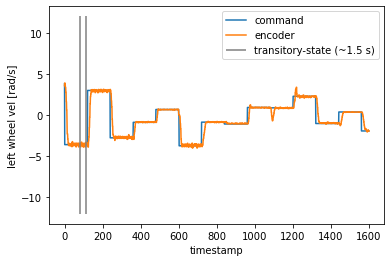

In [5]:
# plot left wheel vel

dt = 0.05
timestamps_per_horizon = 40
start_id = 48
end_id = 88
num_timestamps = int((end_id - start_id) * 40)
print(num_timestamps)
print(end_id * 40 - start_id * 40)

time_vector = np.linspace(0, num_timestamps, num_timestamps)

cmd_vel_left_flat = cmd_left_vels_array.flatten()
encoder_vel_left_flat = encoder_left_vels_array.flatten()

window_start = 2*timestamps_per_horizon+2
steady_state_limits = np.array([window_start, window_start + 30])

plt.plot(time_vector, cmd_vel_left_flat[start_id*40:end_id*40], label='command')
plt.plot(time_vector, encoder_vel_left_flat[start_id*40:end_id*40], label='encoder')
plt.vlines(steady_state_limits, -12, 12, color='C7', label='transitory-state (~1.5 s)')

plt.xlabel('timestamp')
plt.ylabel('left wheel vel [rad/s]')

plt.legend()

280
280


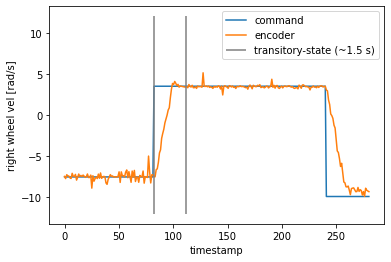

In [63]:
# plot right wheel vel

dt = 0.05
timestamps_per_horizon = 40
start_id = 760
end_id = 767
num_timestamps = int((end_id - start_id) * 40)
print(num_timestamps)
print(end_id * 40 - start_id * 40)

time_vector = np.linspace(0, num_timestamps, num_timestamps)

cmd_vel_right_flat = cmd_right_vels_array.flatten()
encoder_vel_right_flat = encoder_right_vels_array.flatten()

window_start = 2*timestamps_per_horizon+2
steady_state_limits = np.array([window_start, window_start + 30])

plt.plot(time_vector, cmd_vel_right_flat[start_id*40:end_id*40], label='command')
plt.plot(time_vector, encoder_vel_right_flat[start_id*40:end_id*40], label='encoder')
plt.vlines(steady_state_limits, -12, 12, color='C7', label='transitory-state (~1.5 s)')

plt.xlabel('timestamp')
plt.ylabel('right wheel vel [rad/s]')

plt.legend()